# Modelling of France Accidents

**Cohort:** mar23_accidents

**Author:** Johanna Starkl

**Date:** 23 Oktober 2023



## Loading of required libraries

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importing the data

In [5]:
df = pd.read_csv('./data/231018_clean_table_for_analysis.csv', low_memory = False, index_col = 0)

## Data description
### Data

In [6]:
df.head()

,place,catu,sexe,an_nais,trajet,locp,an,mois,jour,lum,...,choc,manv,date,is_holiday,holiday,actp,num_veh,hrmn,grav,etatp
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,2.0,2,2,2002,0.0,-1.0,2019,11,30,4,...,5.0,23.0,2019-11-30,False,NaN,0,14,90,3,0
201900000001,1.0,1,2,1993,5.0,-1.0,2019,11,30,4,...,5.0,23.0,2019-11-30,False,NaN,0,14,90,3,0
201900000001,1.0,1,1,1959,0.0,-1.0,2019,11,30,4,...,3.0,11.0,2019-11-30,False,NaN,0,0,90,0,0
201900000002,1.0,1,2,1994,0.0,-1.0,2019,11,30,3,...,1.0,0.0,2019-11-30,False,NaN,0,0,170,3,0
201900000003,1.0,1,1,1996,0.0,-1.0,2019,11,28,1,...,1.0,2.0,2019-11-28,False,NaN,1,0,915,0,0


### Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 39 columns):
 #   Column      Dtype  
---  ------      -----  
 0   place       float64
 1   catu        int64  
 2   sexe        int64  
 3   an_nais     int64  
 4   trajet      float64
 5   locp        float64
 6   an          int64  
 7   mois        int64  
 8   jour        int64  
 9   lum         int64  
 10  agg         int64  
 11  int         int64  
 12  atm         float64
 13  col         float64
 14  dep         int64  
 15  catr        float64
 16  circ        float64
 17  nbv         float64
 18  vosp        float64
 19  prof        float64
 20  plan        float64
 21  surf        float64
 22  infra       float64
 23  situ        float64
 24  senc        float64
 25  catv        int64  
 26  occutc      float64
 27  obs         float64
 28  obsm        float64
 29  choc        float64
 30  manv        float64
 31  date        object 
 32  is_holiday  bool   
 

### Missing data

In [8]:
df.isna().sum()

place               0
catu                0
sexe                0
an_nais             0
trajet              0
locp                0
an                  0
mois                0
jour                0
lum                 0
agg                 0
int                 0
atm                 0
col                 0
dep                 0
catr                0
circ                0
nbv                 0
vosp                0
prof                0
plan                0
surf                0
infra               0
situ                0
senc                0
catv                0
occutc              0
obs                 0
obsm                0
choc                0
manv                0
date                0
is_holiday          0
holiday       2367768
actp                0
num_veh             0
hrmn                0
grav                0
etatp               0
dtype: int64

This data has no missing values, accept the `holiday` variable which contains the name of the holiday or NaN.

### Drop variables
The dataset contains still some variables that represent information represented by other variables or are a finer granulation. The latter might be added later, if the primary variable is relevant.

- `holiday`: classifies the holiday, but will be used only, if `is_holiday` is relevant

In [9]:
columns_drop = ['holiday']

df.drop(columns = columns_drop, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 38 columns):
 #   Column      Dtype  
---  ------      -----  
 0   place       float64
 1   catu        int64  
 2   sexe        int64  
 3   an_nais     int64  
 4   trajet      float64
 5   locp        float64
 6   an          int64  
 7   mois        int64  
 8   jour        int64  
 9   lum         int64  
 10  agg         int64  
 11  int         int64  
 12  atm         float64
 13  col         float64
 14  dep         int64  
 15  catr        float64
 16  circ        float64
 17  nbv         float64
 18  vosp        float64
 19  prof        float64
 20  plan        float64
 21  surf        float64
 22  infra       float64
 23  situ        float64
 24  senc        float64
 25  catv        int64  
 26  occutc      float64
 27  obs         float64
 28  obsm        float64
 29  choc        float64
 30  manv        float64
 31  date        object 
 32  is_holiday  bool   
 

## Data preparation
### Transform data types
#### Date and time variables
The date and time variables are maybe important as grouping variables or as contrains for time dependent severity of accidents.

_Problem_:

Due to the export to `csv`, the `datatime` data time is lost and thus, it is required to assign it again.

**Steps:**
1. Transform `date` and `hrmn` to `datetime` type.nais` to integer and `date` to `date`.

In [11]:
# Fixing the hrmn issue:
# Transform `date`
df = df.assign(date = pd.to_datetime(df['date']))
df = df.assign(hrmn = pd.to_datetime(df['hrmn']))

In [12]:
df['date'] = df.apply(lambda x: int(x['date'].timestamp()), axis = 1)
df['hrmn'] = df.apply(lambda x: int(x['hrmn'].timestamp()), axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 38 columns):
 #   Column      Dtype  
---  ------      -----  
 0   place       float64
 1   catu        int64  
 2   sexe        int64  
 3   an_nais     int64  
 4   trajet      float64
 5   locp        float64
 6   an          int64  
 7   mois        int64  
 8   jour        int64  
 9   lum         int64  
 10  agg         int64  
 11  int         int64  
 12  atm         float64
 13  col         float64
 14  dep         int64  
 15  catr        float64
 16  circ        float64
 17  nbv         float64
 18  vosp        float64
 19  prof        float64
 20  plan        float64
 21  surf        float64
 22  infra       float64
 23  situ        float64
 24  senc        float64
 25  catv        int64  
 26  occutc      float64
 27  obs         float64
 28  obsm        float64
 29  choc        float64
 30  manv        float64
 31  date        int64  
 32  is_holiday  bool   
 

The correlation matrix shows some intervariable correlations, but no real importance of variables to predict the target `fatal`. 

#### Aggregation and encoding of the target variable
In the previous notebook, we used the `grav` variable as is without any further processing. The modelling result was not satisfying. Therefore, it was decided to aggregate the four classes into two classes "severe" and "non-severe" encoded in `[1,0]`.

In [14]:
# Encoding
df['severe'] = np.where(df['grav'].isin([0, 1]), 0, 1)

In [15]:
df.severe.unique()

array([1, 0])

The following visualisation shows the balance between the two classes. The dataset is much more balanced now compared to the four classes `grav`.

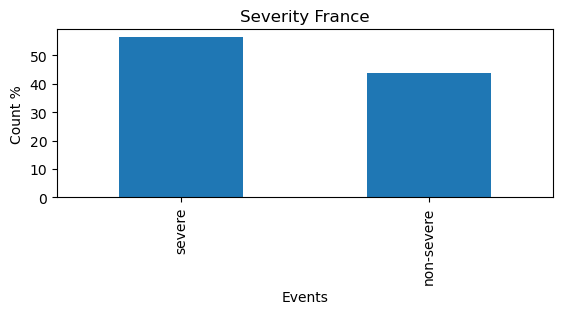

In [16]:
# test if the 
import matplotlib.pyplot as plt
# exploring severe cases in % 
event_counts = df['severe'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['severe','non-severe']
# Add labels and title to the plot
plt.xticks(range(len(event_counts)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France')
# Display the plot
plt.show()

### Preparation of the training and test datasets
#### Split data
The dataset is split by year slides. We decided to drop the Covid-19 years 2020-21. The years 2005 to 2017 are selected for the train dataset and the years 2018 and 2019 for the test dataset. Furthermore, the `grav` variable is dropped because it is encoded in `severe`.


In [17]:
df.drop('grav', axis = 1, inplace = True)

In [19]:
# split the dataset to train and test data
X_train = df.loc[df['an'] < 2018]
X_train = X_train.drop('severe', axis = 1)

X_test = df[(df['an'] >= 2018) & (df['an'] < 2020)]
X_test = X_test.drop('severe', axis = 1)

y_train = df['severe'].loc[df['an'] < 2018]
y_test = df['severe'][(df['an'] >= 2018) & (df['an'] < 2020)]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


#### Data scaling
Decision trees are not sensitive to different scales and thus scaling is not required.

### Modelling the data using a Decision Tree


In [20]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


# Tuning the parameters to find the best decision tree model - start params chosen randomly
model = DecisionTreeClassifier(criterion = 'gini', random_state=50)

param_dist = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8], 
              'min_samples_leaf' : [1, 2, 3], 
              'min_samples_split' : [2, 3, 4], 
              'ccp_alpha': [0.1, 0.01, 0.001]}
            

cv_dt = GridSearchCV(model, param_grid=param_dist, n_jobs=-1)

cv_dt.fit(X_train, y_train)
print('Best Parameters using grid search: \n')
print(cv_dt.best_params_)

Best Parameters using grid search: 

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Train with best parameters

In [21]:
# Training with the best parameters

tree = DecisionTreeClassifier(criterion='entropy', random_state = 50, max_depth=8, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0.001)
tree.fit(X_train, y_train)
y_pred_gini  = tree.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test, y_pred_gini))


Accuracy Score:  0.7484105899778812


In [26]:
# classification_report

print('Classification Report')
print(classification_report(y_test, y_pred_gini))



Classification Report
              precision    recall  f1-score   support

           0       0.73      0.69      0.71    111446
           1       0.76      0.79      0.78    140377

    accuracy                           0.75    251823
   macro avg       0.75      0.74      0.74    251823
weighted avg       0.75      0.75      0.75    251823



In [25]:
pd.crosstab(y_test, y_pred_gini, rownames=['Reality'], colnames=['Prediction'])



Prediction,0,1
Reality,,
0,76914,34532
1,28824,111553


In [27]:
#Training set accuracy

y_pred_train_gini = tree.predict(X_train)

y_pred_train_gini

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7658


In [28]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(tree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(tree.score(X_test, y_test)))

Training set score: 0.7658
Test set score: 0.7484


In [31]:
from sklearn import metrics
#  confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred_gini)  #y_test_preds

# Create a DataFrame from the confusion matrix
class_names = df.severe.values
dataframe = pd.DataFrame(matrix, index=['non-fatal', 'fatal'], 
                         columns=['non-fatal', 'fatal'])

# Display the confusion matrix as text
print("Confusion Matrix:")
print(dataframe)

Confusion Matrix:
           non-fatal   fatal
non-fatal      76914   34532
fatal          28824  111553


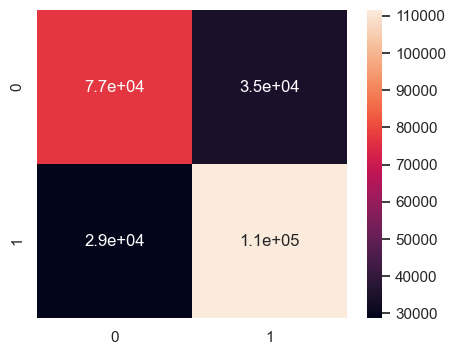

In [33]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize = (5, 4))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True);

In [38]:
total_samples = matrix.sum()

# Calculate the percentages
percentages = (matrix / total_samples) * 100

# Create a DataFrame from the percentages
class_names = df.severe.values
dataframe = pd.DataFrame(percentages, index=['non-fatal', 'fatal'], columns=['non-fatal', 'fatal'])

# Display the confusion matrix as percentages
print("Confusion Matrix (Percentages):")
print(dataframe)

Confusion Matrix (Percentages):
           non-fatal      fatal
non-fatal  30.542881  13.712806
fatal      11.446135  44.298178


In [39]:
# etract thh values from DataFrame

true_negative = dataframe.loc['non-fatal', 'non-fatal']
false_positive = dataframe.loc['non-fatal', 'fatal']
false_negative = dataframe.loc['fatal', 'non-fatal']
true_positive = dataframe.loc['fatal', 'fatal']

# Print the values
print("True Negatives: the model correctly predicted", round(true_negative,2), " % as non-fatal")
print("False Positives: the model incorrectly predicted", round(false_positive,2), " %  as *fatal")
print("False Negatives:the model incorrectly predicted", round(false_negative,2)," %  as *non-fatal")
print("True Positives:the model correctly predicted", round(true_positive,2)," %  as fatal")



True Negatives: the model correctly predicted 30.54  % as non-fatal
False Positives: the model incorrectly predicted 13.71  %  as *fatal
False Negatives:the model incorrectly predicted 11.45  %  as *non-fatal
True Positives:the model correctly predicted 44.3  %  as fatal


Length of feature_names: 37
Length of importances: 37


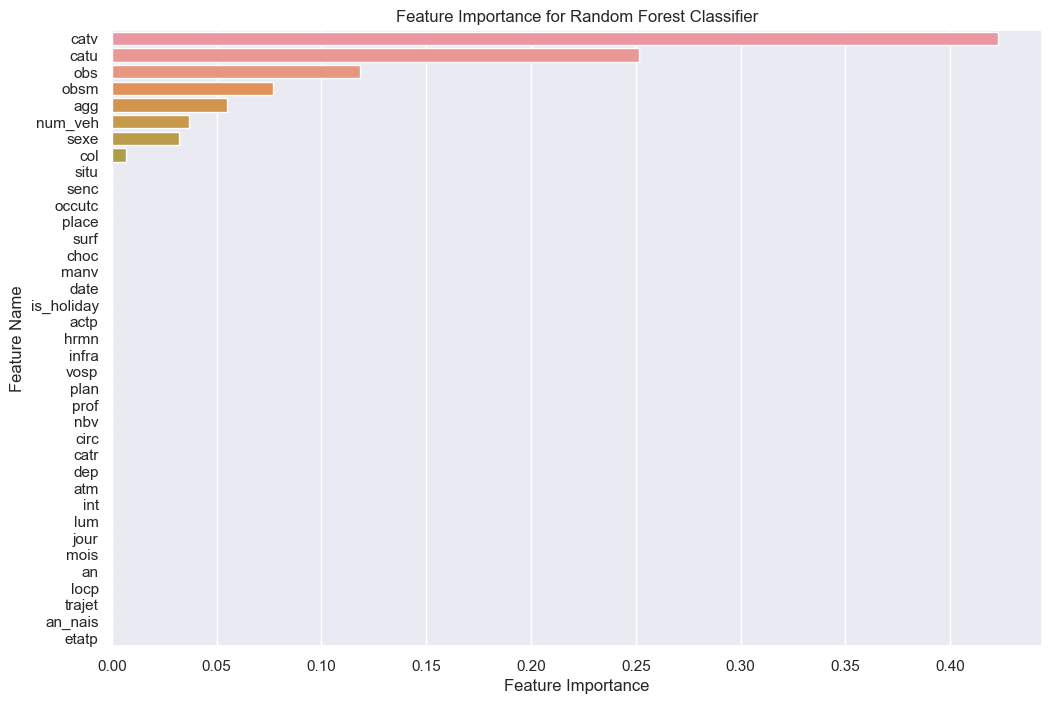

In [42]:
# estimate the feature impotance for thi model
import numpy as np

# Access feature importances from the trained model
importances = tree.feature_importances_

feature_names = df.drop(columns=['severe']).columns.tolist()

# Check the lengths of feature_names and importances
print("Length of feature_names:", len(feature_names))
print("Length of importances:", len(importances))

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()





In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant features (numeric columns)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Define the number of components for PCA
n_components = 10  # You can adjust this based on your requirements

# Perform PCA
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

In [35]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.10038604 0.07114255 0.05753289 0.04519022 0.03606972 0.03483404
 0.03364723 0.03275753 0.03122106 0.03033047]


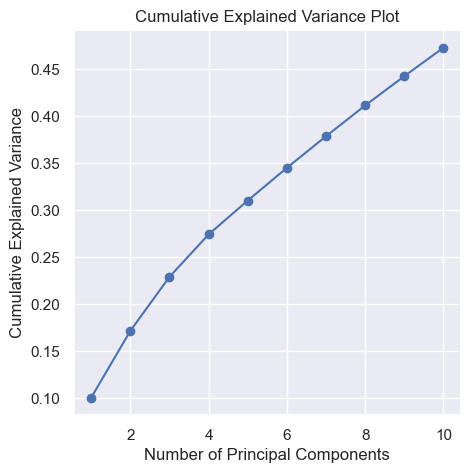

In [36]:
cumulative_variance = explained_variance.cumsum()
figure=plt.figure(figsize=(5,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()